Design and implement a deep learning network for forecasting time series data.

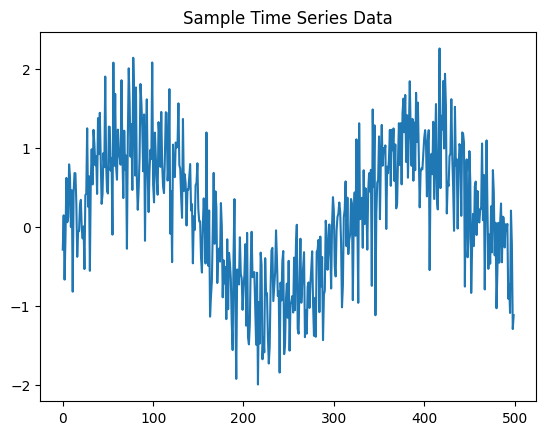

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.1445 - val_loss: 0.0164
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0181 - val_loss: 0.0099
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0173 - val_loss: 0.0099
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0172 - val_loss: 0.0103
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0175 - val_loss: 0.0113
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0178 - val_loss: 0.0112
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0165 - val_loss: 0.0113
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0180 - val_loss: 0.0101
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0147 - val_loss: 0.0101
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - val_loss: 0.0109
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0155 - val_loss: 0.0107
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

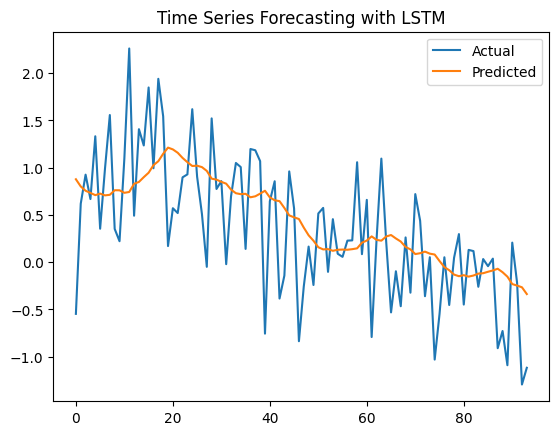

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 1. Generate or load data (for example: sine wave)
time_steps = 500
t = np.arange(time_steps)
data = np.sin(0.02 * t) + 0.5 * np.random.normal(size=time_steps)  # noisy sine wave

# Plot the data
plt.plot(t, data)
plt.title("Sample Time Series Data")
plt.show()

# 2. Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data = data.reshape(-1, 1)
data_scaled = scaler.fit_transform(data)

# 3. Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# 4. Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 6. Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1)

# 7. Predict on test data
y_pred = model.predict(X_test)

# 8. Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# 9. Plot predictions vs actual
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Time Series Forecasting with LSTM")
plt.legend()
plt.show()
